In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from scipy.optimize import curve_fit
from uncertainties import ufloat
from uncertainties import unumpy as unp
import array_to_latex as a2l
import csv
import pandas as pd
from astropy.io.votable import parse
from astropy.table import QTable, Table, Column
from functools import reduce

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) #font na grafih je LaTexov
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{siunitx}')

In [44]:
# konstante

L = 199.5e-2
val_dol = 633e-9
k = np.pi * 2 / val_dol

# podatki

data1 = np.loadtxt('./measurements/1reza.dat')

data2 = np.loadtxt('./measurements/2rezi.dat')

data3 = np.loadtxt('./measurements/3reze.dat')

data5 = np.loadtxt('./measurements/5rez.dat')

data10 = np.loadtxt('./measurements/10rez.dat')


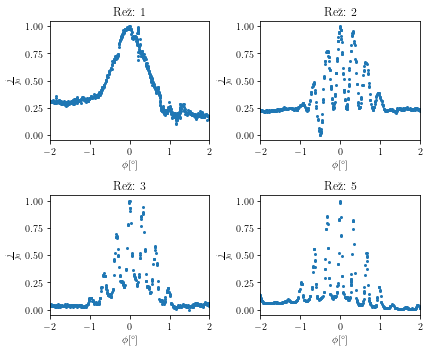

In [45]:
fig, axs = plt.subplots(2, 2, figsize=[6, 5])

aux = [[data1, data2, data3, data5], 
    axs.flat, 
    [1, 2, 3, 5]]

for data, ax, st in zip(*aux): 
    data[:, 0] = data[:, 0] * 1e-3

    x_0 = data[np.argmax(data[:, 1]), 0]

    phi = (data[:, 0] - x_0) / L

    data[:, 1] = data[:, 1] - np.min(data[:, 1])

    data[:, 1] = data[:, 1] / np.max(data[:, 1])

    ax.plot(np.rad2deg(phi), data[:, 1], linestyle='', marker='o', markersize=2)
    ax.set_xlim(-2, 2)
    ax.set_title(f'Rež: {st}')
    ax.set_xlabel(r'$\phi [^\circ]$')
    ax.set_ylabel(r'$\frac{j}{j_0}$')

fig.tight_layout()
fig.savefig('reze.pdf')

In [ ]:
def linear(x, k, c): 
    return 